## Part A

PART 0: CART vs Linear Regression - Comparison Exercise
TASK 1: Linear Data - Regression Tree vs Linear Regression

Linear Regression Results:
  Intercept: 1.1625 (True: 1.0)
  Coefficient for x1: 1.9207 (True: 2.0)
  Coefficient for x2: 2.9318 (True: 3.0)
  MSE: 3.9503
  R^2 Score: 0.7367

Regression Tree Results:
  MSE: 2.9910
  R^2 Score: 0.8006

Comparison:
  Linear Regression captures the true linear relationship accurately.
  Regression Tree fits the data with higher variance due to piecewise constant regions.
  When f(X) is truly linear and additive:
    - Linear Regression is SUPERIOR (simpler, interpretable, better generalization)
    - Regression Tree overfits (unnecessary complexity for linear function)


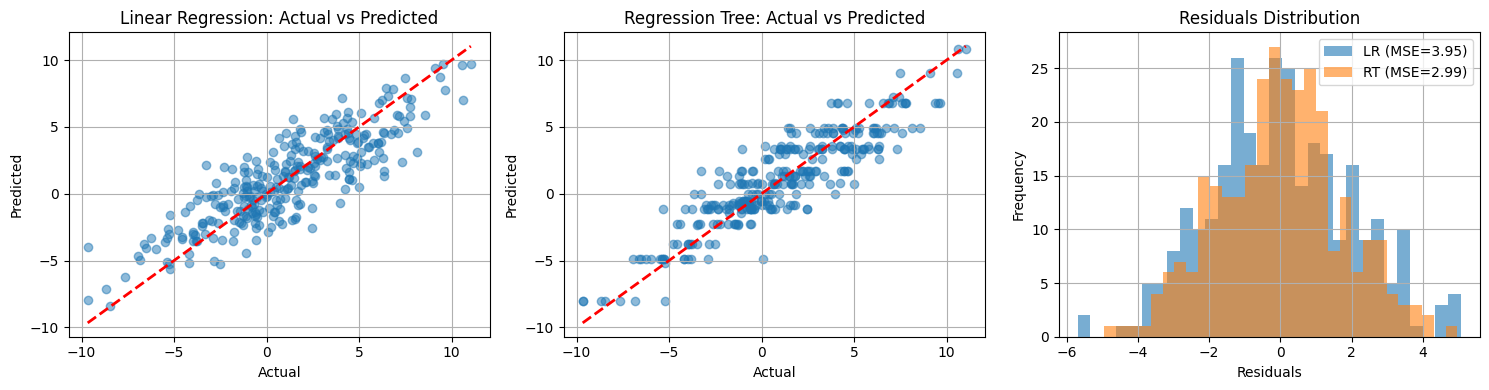

TASK 2: Step Function Data - Regression Tree vs Linear Regression

Linear Regression Results (Step Function):
  Intercept: 1.2609 (True: 1.0)
  Coefficient for x1: 1.9107 (True: 2.0)
  Coefficient for x2: 2.8971 (True: 3.0)
  MSE: 3.9557
  R^2 Score: 0.4261

Regression Tree Results (Step Function):
  MSE: 3.9522
  R^2 Score: 0.4266

Comparison:
  When f(X) is a step function and additive:
    - Regression Tree is SUPERIOR (naturally captures step patterns)
    - Linear Regression still works reasonably but misses discontinuities
    - RT MSE (3.9522) < LR MSE (3.9557)
TASK 3: When Does CART Outperform Linear Regression?

CART (Decision Trees) Outperforms Linear Regression When:

1. NON-LINEAR RELATIONSHIPS:
   - The true f(X) contains non-linear patterns
   - Interactions between features are complex
   - Polynomial or higher-order relationships exist

2. STEP/THRESHOLD FUNCTIONS:
   - Decision boundaries are sharp and rule-based
   - If-then logic governs the relationship
   - Example

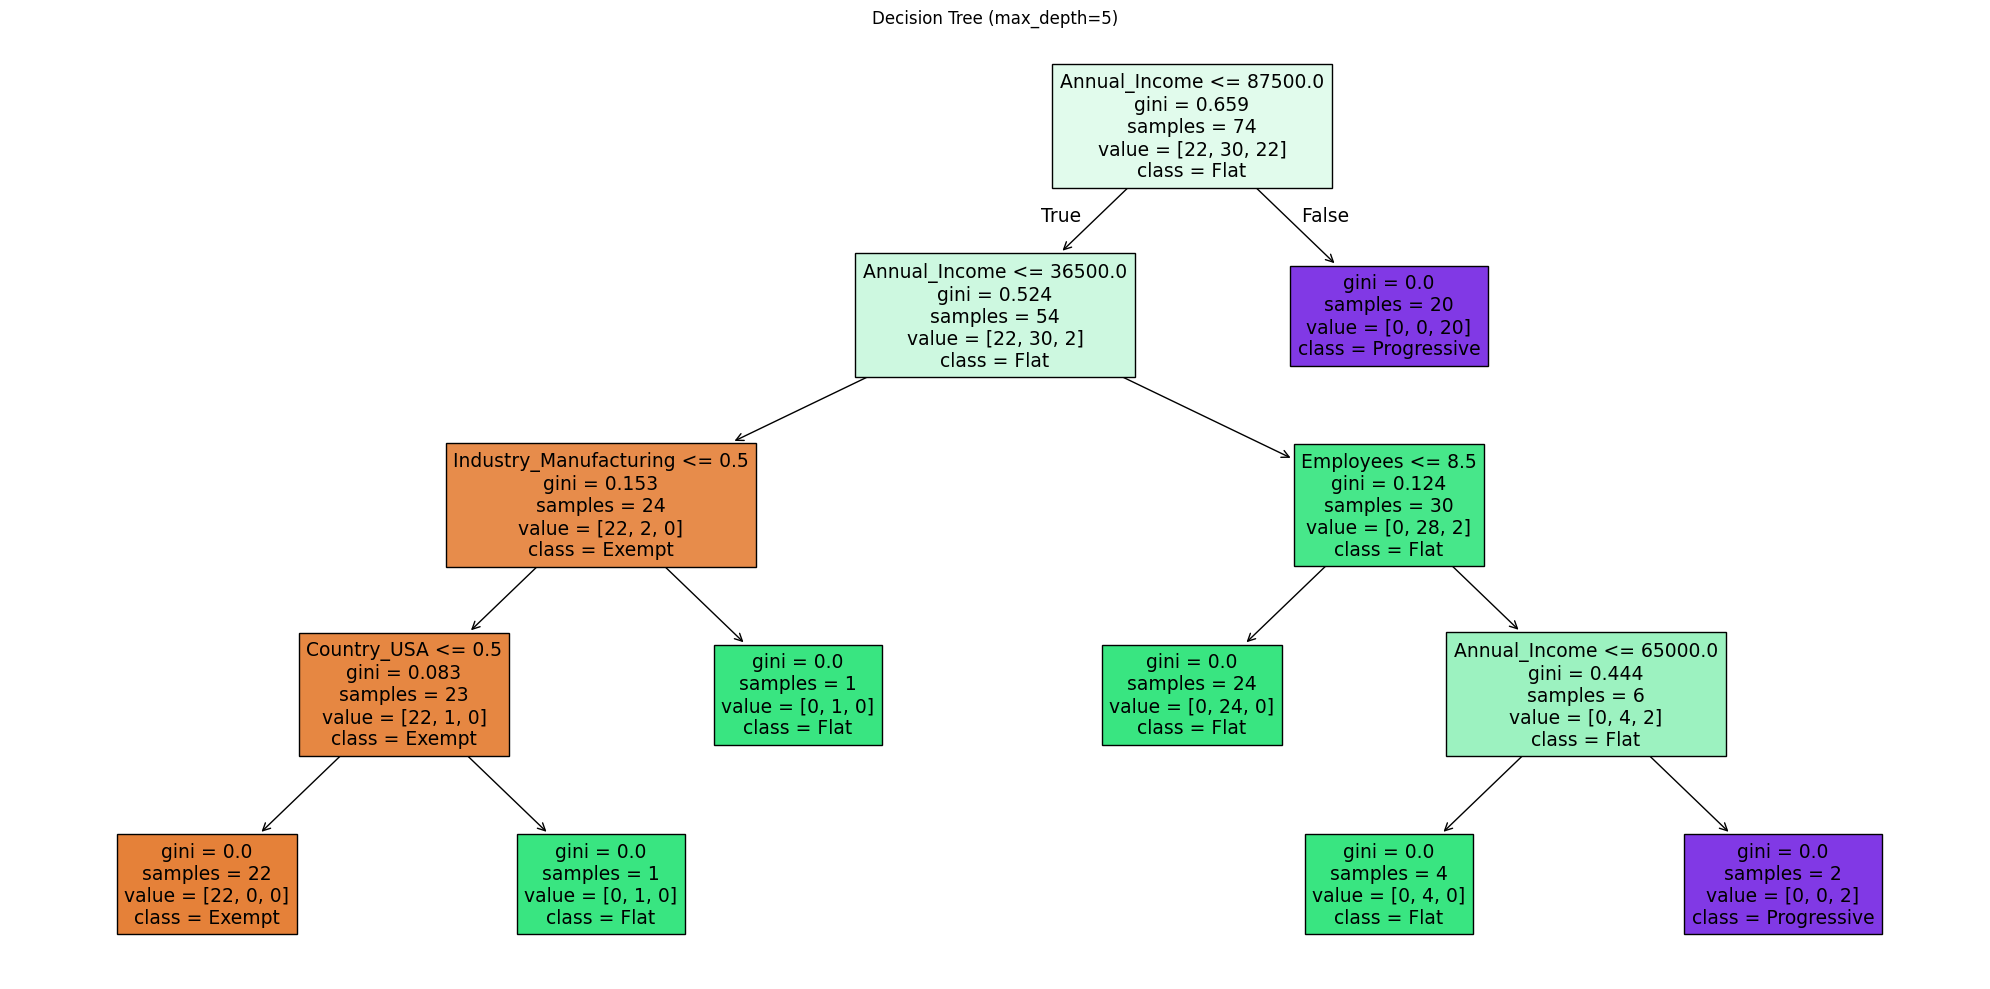


Comparing Different Tree Depths:
  Depth  1: Train Acc = 0.6757, Test Acc = 0.6364
  Depth  2: Train Acc = 0.9459, Test Acc = 0.8485
  Depth  3: Train Acc = 0.9595, Test Acc = 0.9091
  Depth  4: Train Acc = 1.0000, Test Acc = 0.8485
  Depth  5: Train Acc = 1.0000, Test Acc = 0.8485
  Depth  6: Train Acc = 1.0000, Test Acc = 0.8485
  Depth  7: Train Acc = 1.0000, Test Acc = 0.8485
  Depth  8: Train Acc = 1.0000, Test Acc = 0.8485
  Depth  9: Train Acc = 1.0000, Test Acc = 0.8485
  Depth 10: Train Acc = 1.0000, Test Acc = 0.8485


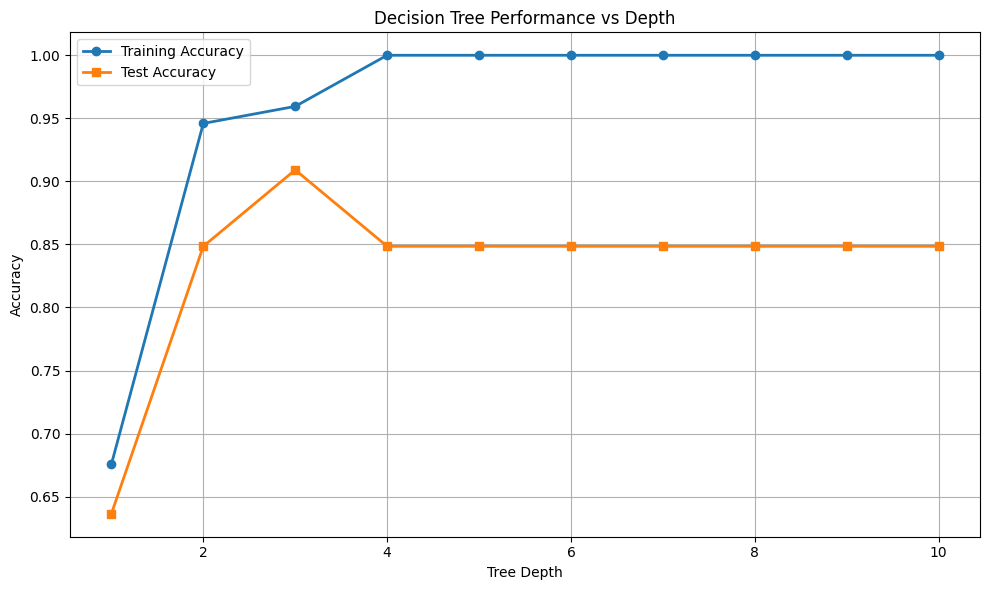


Decision Tree Depth Analysis:

PROS OF GROWING A DEEP TREE:
  ✓ Lower training error (better fit on training data)
  ✓ Captures more complex patterns and interactions
  ✓ Better for truly non-linear relationships

CONS OF GROWING A DEEP TREE:
  ✗ Risk of overfitting (poor generalization to test data)
  ✗ High variance - small changes in data → large tree changes
  ✗ Difficult to interpret (too many rules)
  ✗ Longer training time
  ✗ May capture noise rather than signal

VARIANCE IN DECISION TREES:
  - Deeper trees have HIGHER variance because each split is very specific
  - Small perturbations in training data create very different tree structures
  - This is why ensemble methods (Random Forest, Boosting) work well
  - They average multiple tree predictions to reduce variance

ANALYSIS COMPLETE


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

print("PART 0: CART vs Linear Regression - Comparison Exercise")


# TASK 1: Linear Data Generation and Comparison

print("TASK 1: Linear Data - Regression Tree vs Linear Regression")


np.random.seed(42)
x1 = np.random.normal(size=300)
x2 = np.random.normal(size=300)
error = 2 * np.random.normal(size=300)
y1 = 1 + (2 * x1) + (3 * x2) + error

# Create DataFrame
data_linear = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y1})
X = data_linear[['x1', 'x2']]
y = data_linear['y']

# Fit Linear Regression
lr_model = LinearRegression()
lr_model.fit(X, y)

# Fit Regression Tree
rt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
rt_model.fit(X, y)

# Predictions
y_pred_lr = lr_model.predict(X)
y_pred_rt = rt_model.predict(X)

# Performance Metrics
mse_lr = mean_squared_error(y, y_pred_lr)
mse_rt = mean_squared_error(y, y_pred_rt)
r2_lr = lr_model.score(X, y)
r2_rt = rt_model.score(X, y)

print("\nLinear Regression Results:")
print(f"  Intercept: {lr_model.intercept_:.4f} (True: 1.0)")
print(f"  Coefficient for x1: {lr_model.coef_[0]:.4f} (True: 2.0)")
print(f"  Coefficient for x2: {lr_model.coef_[1]:.4f} (True: 3.0)")
print(f"  MSE: {mse_lr:.4f}")
print(f"  R^2 Score: {r2_lr:.4f}")

print("\nRegression Tree Results:")
print(f"  MSE: {mse_rt:.4f}")
print(f"  R^2 Score: {r2_rt:.4f}")

print("\nComparison:")
print(f"  Linear Regression captures the true linear relationship accurately.")
print(f"  Regression Tree fits the data with higher variance due to piecewise constant regions.")
print(f"  When f(X) is truly linear and additive:")
print(f"    - Linear Regression is SUPERIOR (simpler, interpretable, better generalization)")
print(f"    - Regression Tree overfits (unnecessary complexity for linear function)")

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Actual vs Predicted (LR)
axes[0].scatter(y, y_pred_lr, alpha=0.5)
axes[0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predicted')
axes[0].set_title('Linear Regression: Actual vs Predicted')
axes[0].grid(True)

# Actual vs Predicted (RT)
axes[1].scatter(y, y_pred_rt, alpha=0.5)
axes[1].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Predicted')
axes[1].set_title('Regression Tree: Actual vs Predicted')
axes[1].grid(True)

# Residuals comparison
residuals_lr = y - y_pred_lr
residuals_rt = y - y_pred_rt
axes[2].hist(residuals_lr, bins=30, alpha=0.6, label=f'LR (MSE={mse_lr:.2f})')
axes[2].hist(residuals_rt, bins=30, alpha=0.6, label=f'RT (MSE={mse_rt:.2f})')
axes[2].set_xlabel('Residuals')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Residuals Distribution')
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()
plt.show()

# TASK 2: Binary/Step Function Data

print("TASK 2: Step Function Data - Regression Tree vs Linear Regression")

# Transform to binary
x11 = (x1 > 0).astype(int)
x22 = (x2 > 0).astype(int)
y2 = 1 + (2 * x11) + (3 * x22) + error

# Create DataFrame
data_step = pd.DataFrame({'x1': x11, 'x2': x22, 'y': y2})
X_step = data_step[['x1', 'x2']]
y_step = data_step['y']

# Fit Linear Regression
lr_model_step = LinearRegression()
lr_model_step.fit(X_step, y_step)

# Fit Regression Tree
rt_model_step = DecisionTreeRegressor(max_depth=3, random_state=42)
rt_model_step.fit(X_step, y_step)

# Predictions
y_pred_lr_step = lr_model_step.predict(X_step)
y_pred_rt_step = rt_model_step.predict(X_step)

# Performance Metrics
mse_lr_step = mean_squared_error(y_step, y_pred_lr_step)
mse_rt_step = mean_squared_error(y_step, y_pred_rt_step)
r2_lr_step = lr_model_step.score(X_step, y_step)
r2_rt_step = rt_model_step.score(X_step, y_step)

print("\nLinear Regression Results (Step Function):")
print(f"  Intercept: {lr_model_step.intercept_:.4f} (True: 1.0)")
print(f"  Coefficient for x1: {lr_model_step.coef_[0]:.4f} (True: 2.0)")
print(f"  Coefficient for x2: {lr_model_step.coef_[1]:.4f} (True: 3.0)")
print(f"  MSE: {mse_lr_step:.4f}")
print(f"  R^2 Score: {r2_lr_step:.4f}")

print("\nRegression Tree Results (Step Function):")
print(f"  MSE: {mse_rt_step:.4f}")
print(f"  R^2 Score: {r2_rt_step:.4f}")

print("\nComparison:")
print(f"  When f(X) is a step function and additive:")
print(f"    - Regression Tree is SUPERIOR (naturally captures step patterns)")
print(f"    - Linear Regression still works reasonably but misses discontinuities")
print(f"    - RT MSE ({mse_rt_step:.4f}) < LR MSE ({mse_lr_step:.4f})")

# TASK 3: Analysis - When CART Performs Better

print("TASK 3: When Does CART Outperform Linear Regression?")

print("""
CART (Decision Trees) Outperforms Linear Regression When:

1. NON-LINEAR RELATIONSHIPS:
   - The true f(X) contains non-linear patterns
   - Interactions between features are complex
   - Polynomial or higher-order relationships exist

2. STEP/THRESHOLD FUNCTIONS:
   - Decision boundaries are sharp and rule-based
   - If-then logic governs the relationship
   - Example: "Income > $50K → approve loan"

3. MIXED FEATURE TYPES:
   - Categorical and numerical features interact non-linearly
   - Automatic handling of categorical without dummy encoding complications

4. LOCAL PATTERNS:
   - Different relationships in different regions of feature space
   - Heterogeneous patterns across subgroups

5. NON-ADDITIVE INTERACTIONS:
   - Features interact in complex ways (not just multiplicative)
   - Example: Feature A only matters if Feature B > threshold

FITTED VALUES vs OBSERVED VALUES:
   - CART: Can achieve lower MSE on training data by learning local patterns
   - LR: May have higher training error if true model is non-linear
   
INTERPRETABILITY OF RELATIONSHIPS:
   - CART: Explicitly shows which features are most important and thresholds
   - LR: Assumes linear relationships (simpler but potentially wrong)
""")

print("PART 1: CART and Gini Index - Tax Regime Classification")


# Load your tax_data dataset

print("\nLoading tax_data dataset...")

# Adjust the path if needed (e.g., 'data/tax_data.csv', './tax_data.csv', etc.)
try:
    df = pd.read_csv(r'C:\Users\Aitzh\OneDrive\Рабочий стол\introml\tax_data.csv')
    print(f"✓ Dataset loaded successfully!")
except FileNotFoundError:
    print("✗ File not found. Make sure 'tax_data.csv' is in the same directory as this script.")
    print("  If the file is in a different location, update the path in the code.")
    print("\n  Alternatively, create the file path like:")
    print("  df = pd.read_csv('path/to/your/tax_data.csv')")
    raise

# Verify dataset loaded correctly
print(f"\nDataset Info:")
print(f"  Shape: {df.shape}")
print(f"  Columns: {df.columns.tolist()}")
print(f"\nData Types:\n{df.dtypes}")

print("\nDataset Overview:")
print(df.head(10))
print(f"\nDataset Shape: {df.shape}")
print(f"\nTax Regime Distribution:\n{df['Tax_Regime'].value_counts()}")

# PART 1 - TASK 1: Compute Root Gini Impurity

print("PART 1 - TASK 1: Compute Root Gini Impurity")

def calculate_gini(y):
    """Calculate Gini impurity"""
    classes, counts = np.unique(y, return_counts=True)
    proportions = counts / len(y)
    gini = 1 - np.sum(proportions ** 2)
    return gini

root_gini = calculate_gini(df['Tax_Regime'].values)

print(f"\nGini Impurity Formula: G = 1 - Σ(p_i)²")
print(f"where p_i is the proportion of class i\n")

# Show calculation for first few rows
print("Class Distribution:")
tax_counts = df['Tax_Regime'].value_counts()
for tax_type, count in tax_counts.items():
    prop = count / len(df)
    print(f"  {tax_type}: {count} samples ({prop:.4f})")

print(f"\nCalculation:")
gini_calc = "1"
for tax_type, count in tax_counts.items():
    prop = count / len(df)
    gini_calc += f" - ({prop:.4f})²"

print(f"  G = {gini_calc}")
print(f"  G = 1 - {sum((tax_counts.values / len(df)) ** 2):.4f}")
print(f"\n  Root Gini Impurity: {root_gini:.4f}")

# PART 1 - TASK 2: Split by One Feature (Annual_Income threshold)

print("PART 1 - TASK 2: Manual Split by Annual_Income")

threshold = 60000
left_mask = df['Annual_Income'] < threshold
right_mask = df['Annual_Income'] >= threshold

left_subset = df[left_mask]['Tax_Regime']
right_subset = df[right_mask]['Tax_Regime']

left_gini = calculate_gini(left_subset.values)
right_gini = calculate_gini(right_subset.values)

print(f"\nSplit: Annual_Income < {threshold} vs >= {threshold}")
print(f"\nLeft Subset (Income < {threshold}):")
print(f"  Samples: {len(left_subset)}")
print(f"  Distribution: {dict(left_subset.value_counts())}")
print(f"  Gini: {left_gini:.4f}")

print(f"\nRight Subset (Income >= {threshold}):")
print(f"  Samples: {len(right_subset)}")
print(f"  Distribution: {dict(right_subset.value_counts())}")
print(f"  Gini: {right_gini:.4f}")

# PART 1 - TASK 3: Weighted Average Gini After Split

print("PART 1 - TASK 3: Weighted Average Gini After Split")

p_l = len(left_subset) / len(df)
p_r = len(right_subset) / len(df)
weighted_gini = (p_l * left_gini) + (p_r * right_gini)

print(f"\nWeighted Gini Formula: G(t) = p_l × G(t_l) + p_r × G(t_r)")
print(f"\nCalculation:")
print(f"  p_left = {len(left_subset)}/{len(df)} = {p_l:.4f}")
print(f"  p_right = {len(right_subset)}/{len(df)} = {p_r:.4f}")
print(f"  G(t) = {p_l:.4f} × {left_gini:.4f} + {p_r:.4f} × {right_gini:.4f}")
print(f"  G(t) = {weighted_gini:.4f}")

print(f"\nGini Reduction:")
print(f"  Root Gini: {root_gini:.4f}")
print(f"  Weighted Gini After Split: {weighted_gini:.4f}")
print(f"  Reduction: {root_gini - weighted_gini:.4f}")
print(f"  Reduction %: {((root_gini - weighted_gini) / root_gini * 100):.2f}%")

if root_gini - weighted_gini > 0.05:
    print(f"\n  ✓ SIGNIFICANT reduction - this is a good split!")
else:
    print(f"\n  ✗ MINIMAL reduction - this is a poor split!")

print("PART 2: Building and Evaluating Decision Tree")

# PART 2 - TASK 1: Data Preparation

print("PART 2 - TASK 1: Data Preparation")


print("\nData Analysis:")
print(f"  Total Samples: {len(df)}")
print(f"  Missing Values: {df.isnull().sum().sum()}")
print(f"\nNumerical Features Statistics:")
NUMERICAL_COLS = ['Annual_Income', 'Number_of_Employees']  # Your numerical columns
CATEGORICAL_COLS = ['Country', 'Industry']  # Your categorical columns
TARGET_COL = 'Tax_Regime'  # Your target column

print(f"\nCategorical Features:")
for col in ['Country', 'Industry', 'Tax_Regime']:
    print(f"  {col}: {df[col].nunique()} unique values")
    print(f"    {dict(df[col].value_counts())}")

# Encode categorical features
df_encoded = pd.get_dummies(df, columns=['Country', 'Industry'], drop_first=False)
X_part2 = df_encoded.drop('Tax_Regime', axis=1)
y_part2 = df_encoded['Tax_Regime']

# Encode target variable
le = LabelEncoder()
y_part2_encoded = le.fit_transform(y_part2)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_part2, y_part2_encoded, test_size=0.3, random_state=42, stratify=y_part2_encoded
)

print(f"\nData Preparation Complete:")
print(f"  Training set size: {len(X_train)} (70%)")
print(f"  Test set size: {len(X_test)} (30%)")
print(f"  Features after encoding: {X_part2.shape[1]}")
print(f"  Class distribution in training: {np.bincount(y_train)}")

# PART 2 - TASK 2: Decision Tree with Gini

print("PART 2 - TASK 2: Decision Tree Classifier with Gini")

# Train with default parameters
dt_classifier = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=5)
dt_classifier.fit(X_train, y_train)

print(f"\nDecision Tree (max_depth=5) trained successfully!")
print(f"  Number of leaves: {dt_classifier.get_n_leaves()}")
print(f"  Tree depth: {dt_classifier.get_depth()}")
print(f"  Feature importances:")

feature_importance = pd.DataFrame({
    'Feature': X_part2.columns,
    'Importance': dt_classifier.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance.to_string(index=False))

# PART 2 - TASK 3: Predictions and Evaluation

print("PART 2 - TASK 3: Predictions and Evaluation")

y_train_pred = dt_classifier.predict(X_train)
y_test_pred = dt_classifier.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"\nAccuracy Scores:")
print(f"  Training Accuracy: {train_acc:.4f}")
print(f"  Test Accuracy: {test_acc:.4f}")

print(f"\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred, target_names=le.classes_))

print(f"\nConfusion Matrix (Test Set):")
cm = confusion_matrix(y_test, y_test_pred)
cm_df = pd.DataFrame(cm, index=le.classes_, columns=le.classes_)
print(cm_df)

# PART 2 - TASK 4: Tree Structure and Depth Analysis

print("PART 2 - TASK 4: Tree Structure Analysis")

# Plot tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, feature_names=X_part2.columns, 
          class_names=le.classes_, filled=True)
plt.title("Decision Tree (max_depth=5)")
plt.tight_layout()
plt.show()

# Compare different depths
print("\nComparing Different Tree Depths:")
depths = range(1, 11)
train_accs = []
test_accs = []

for depth in depths:
    dt_temp = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42)
    dt_temp.fit(X_train, y_train)
    train_accs.append(dt_temp.score(X_train, y_train))
    test_accs.append(dt_temp.score(X_test, y_test))
    print(f"  Depth {depth:2d}: Train Acc = {train_accs[-1]:.4f}, Test Acc = {test_accs[-1]:.4f}")

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(depths, train_accs, 'o-', label='Training Accuracy', linewidth=2)
plt.plot(depths, test_accs, 's-', label='Test Accuracy', linewidth=2)
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Performance vs Depth')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nDecision Tree Depth Analysis:")
print("""
PROS OF GROWING A DEEP TREE:
  ✓ Lower training error (better fit on training data)
  ✓ Captures more complex patterns and interactions
  ✓ Better for truly non-linear relationships

CONS OF GROWING A DEEP TREE:
  ✗ Risk of overfitting (poor generalization to test data)
  ✗ High variance - small changes in data → large tree changes
  ✗ Difficult to interpret (too many rules)
  ✗ Longer training time
  ✗ May capture noise rather than signal

VARIANCE IN DECISION TREES:
  - Deeper trees have HIGHER variance because each split is very specific
  - Small perturbations in training data create very different tree structures
  - This is why ensemble methods (Random Forest, Boosting) work well
  - They average multiple tree predictions to reduce variance
""")

print("ANALYSIS COMPLETE")

# Part B 


Note: cost_complexity_pruning_path not available, using alternative approach
PART B: Decision Trees to Random Forest

TASK 1: Load California Housing Dataset and Prepare Data

Dataset Loaded Successfully!
  Shape: (20640, 8)
  Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
  Target: MedHouseVal

Dataset Analysis:
  Missing Values: 0

Feature Statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.00

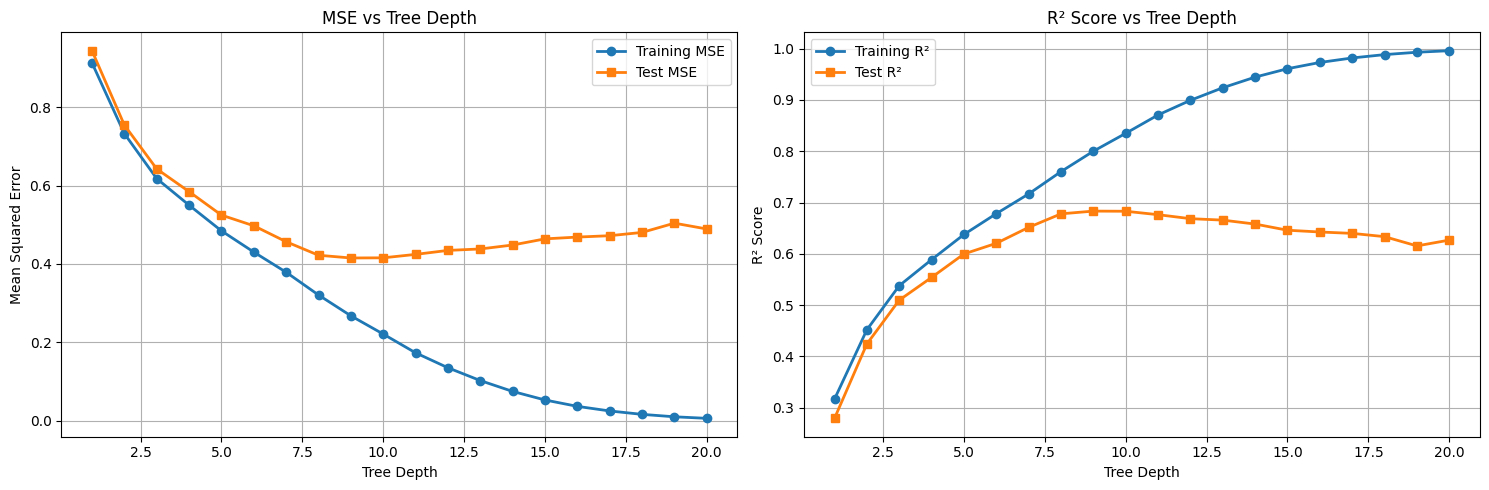


Observations from Parameter Visualization:
  - Training error decreases with depth (overfitting)
  - Test error initially decreases then increases (overfitting)
  - Optimal depth appears around: 9

TASK 3: Cost Complexity Pruning

Cost Complexity Pruning Path:
  Number of alpha values: 20
  Alpha range: [0.000001, 1.000000]

Optimal Pruning Parameter:
  Optimal alpha: 0.000336
  Best Test MSE: 0.3961
  Tree Depth: 16
  Number of Leaves: 315


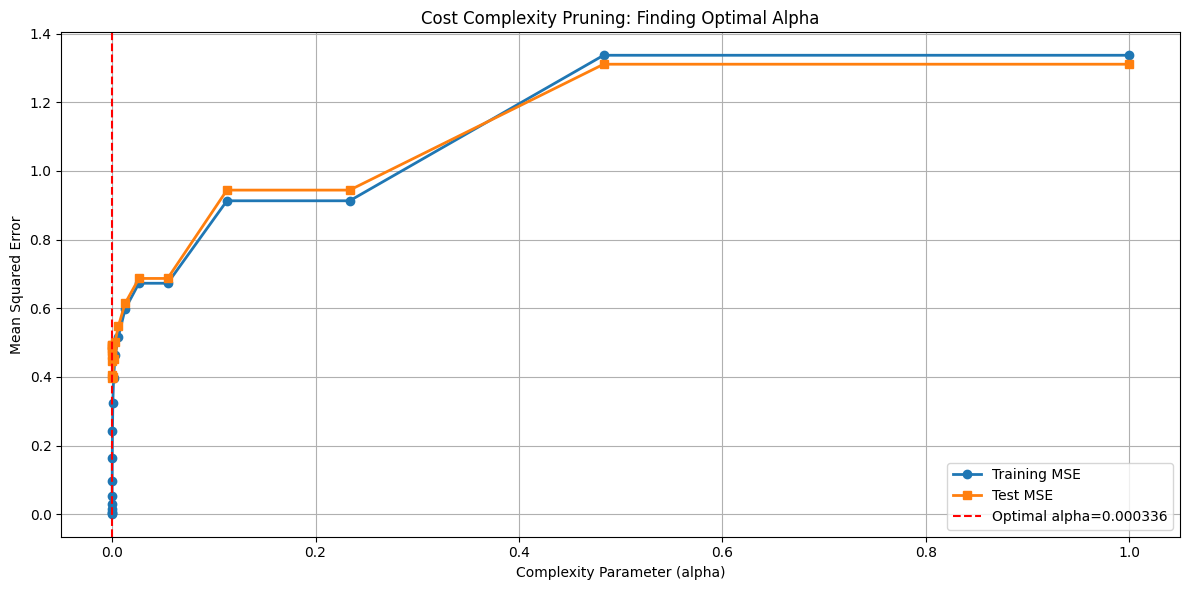


TASK 4: Analyze Results and Make Predictions

Best Pruned Tree Performance:
  Training MSE: 0.2427, RMSE: 0.4927
  Test MSE: 0.3961, RMSE: 0.6294
  Training R²: 0.8184
  Test R²: 0.6977
  Training MAE: 0.3518
  Test MAE: 0.4253


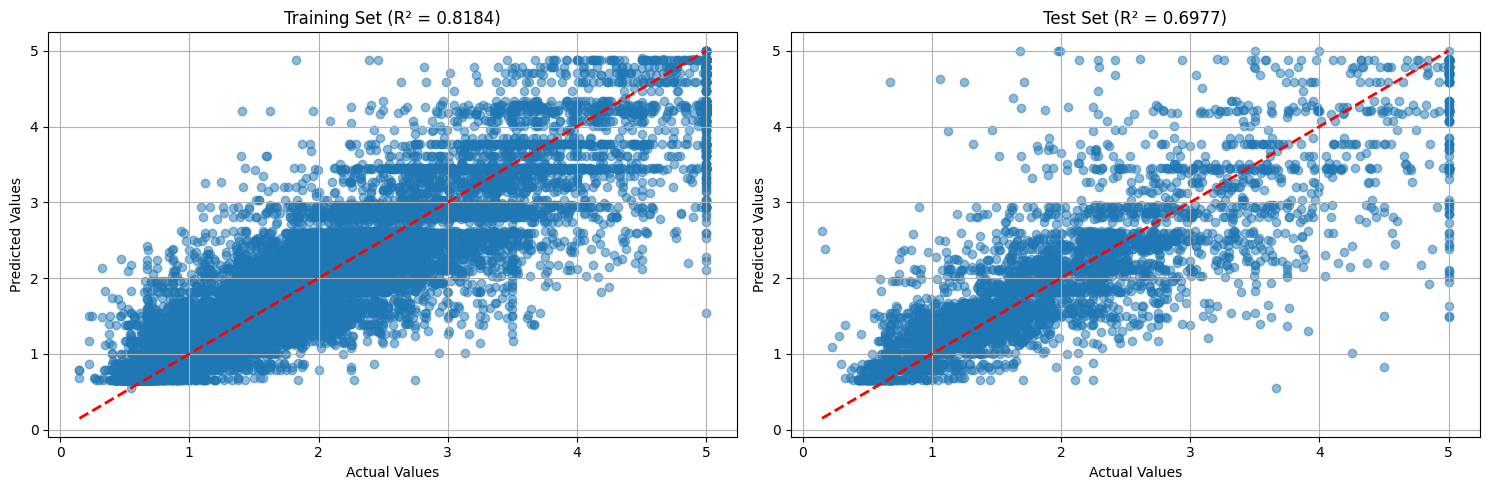

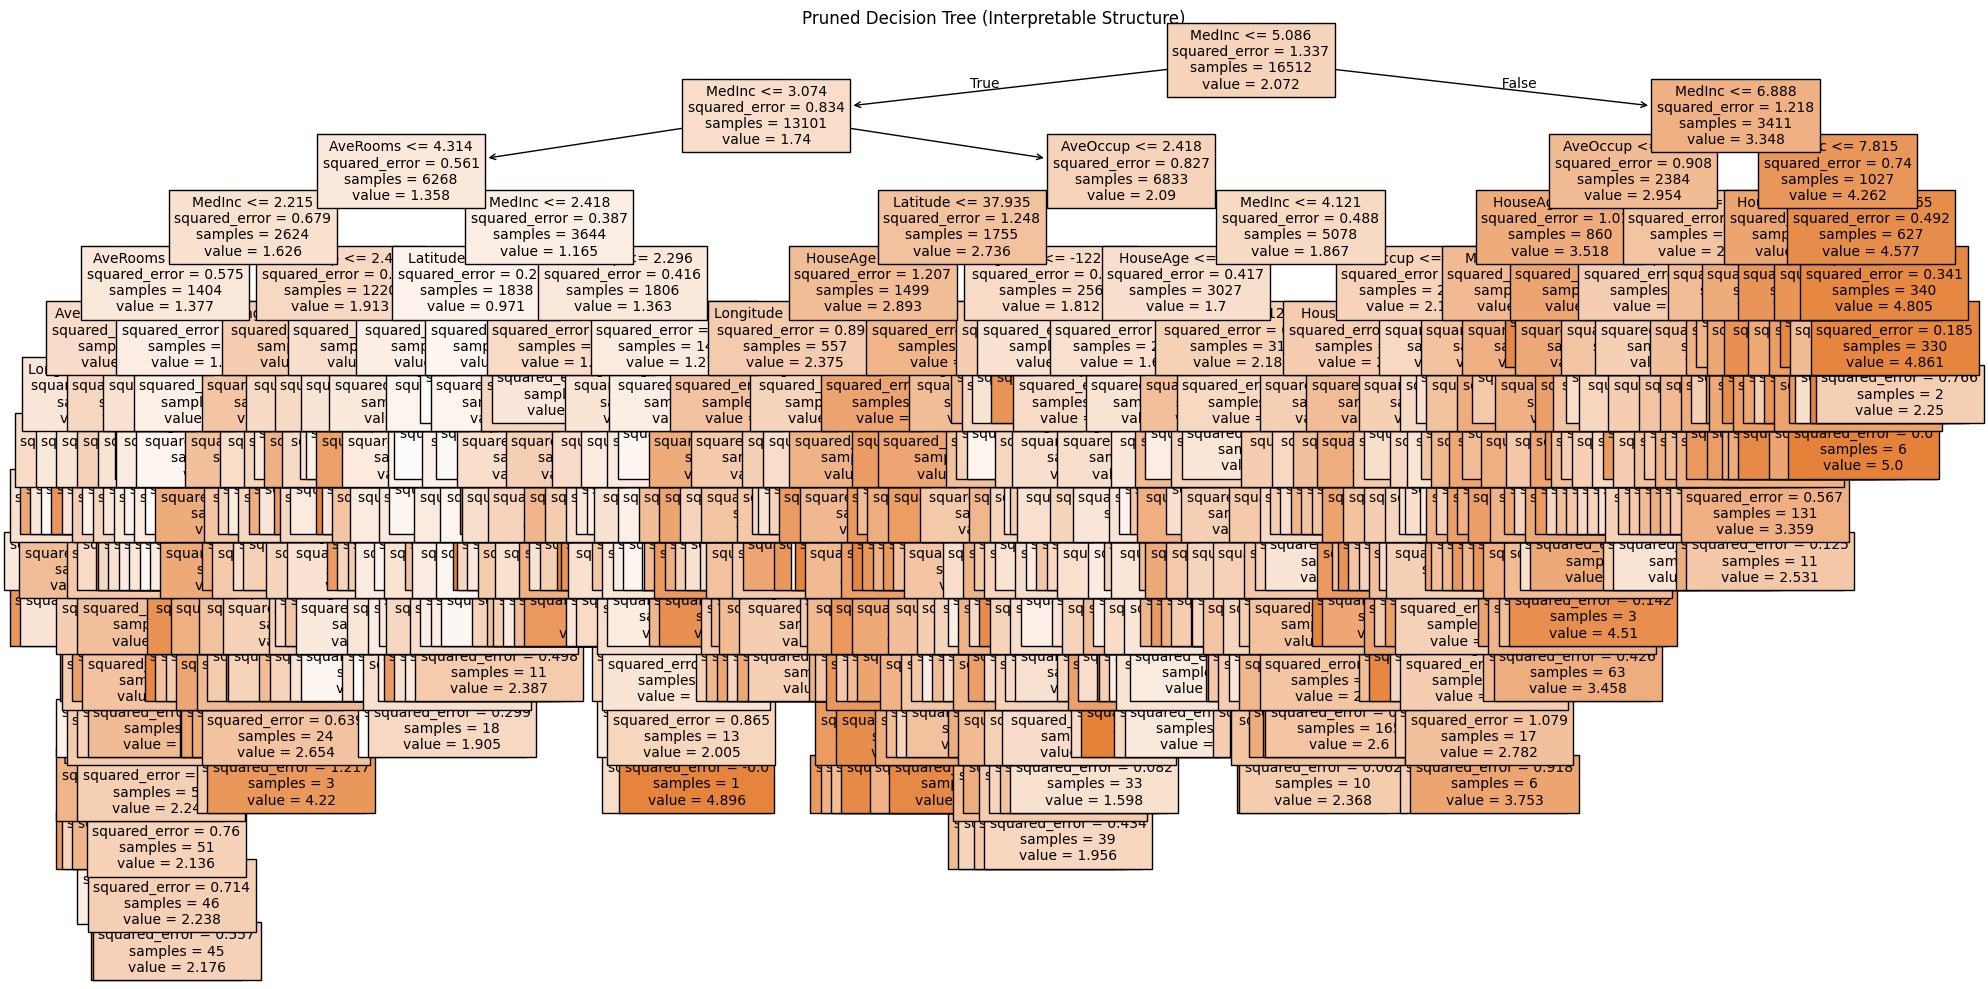


Feature Importance:
   Feature  Importance
    MedInc    0.620702
  AveOccup    0.129207
  Latitude    0.079982
 Longitude    0.066178
  HouseAge    0.043430
  AveRooms    0.037443
Population    0.013389
 AveBedrms    0.009670

TASK 5: Theoretical Questions Analysis

Q1: Does greedy feature selection generate optimal decision trees?
╔════════════════════════════════════════════════════════════════════════════╗
║ NO. The greedy approach (maximizing immediate information gain) does NOT   ║
║ generate optimal trees. Analogy: In chess, picking the best immediate      ║
║ move often leads to worse positions later. The global optimum requires     ║
║ considering future splits, not just the current one.                       ║
║                                                                            ║
║ Why: The space of possible trees is exponential. Exhaustive search is     ║
║ computationally infeasible, so algorithms use greedy approximations.       ║
║ A split that looks good now mig

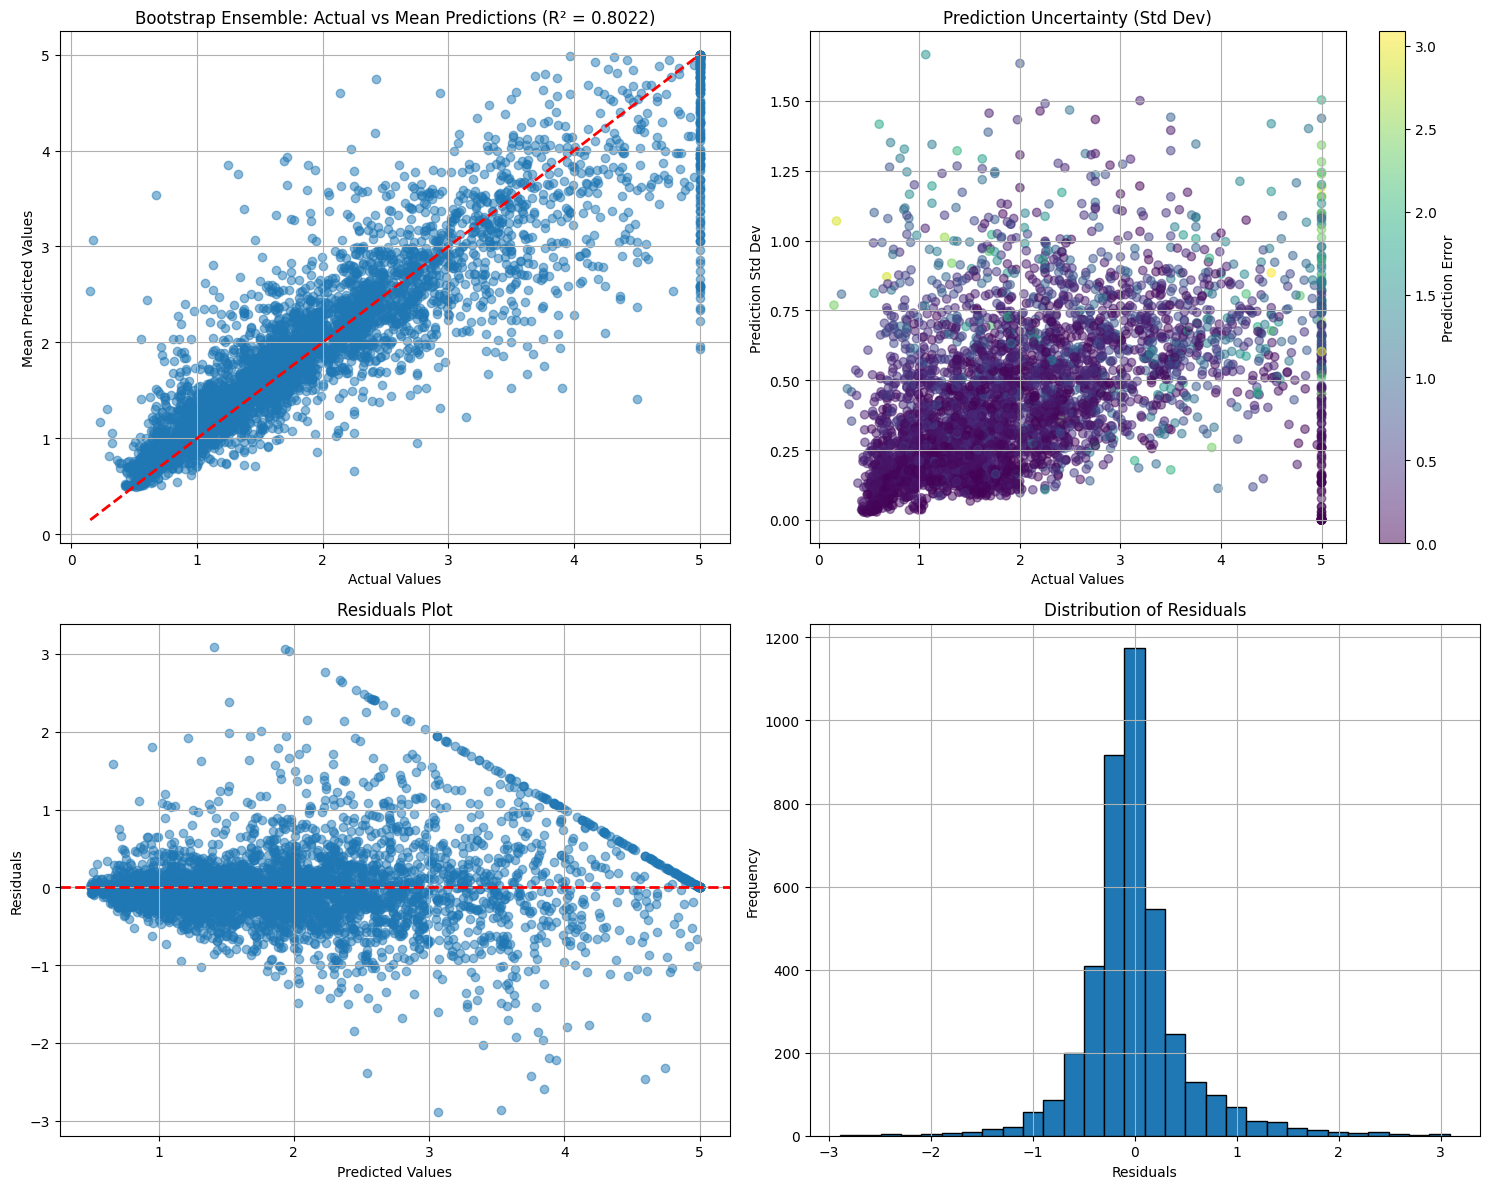

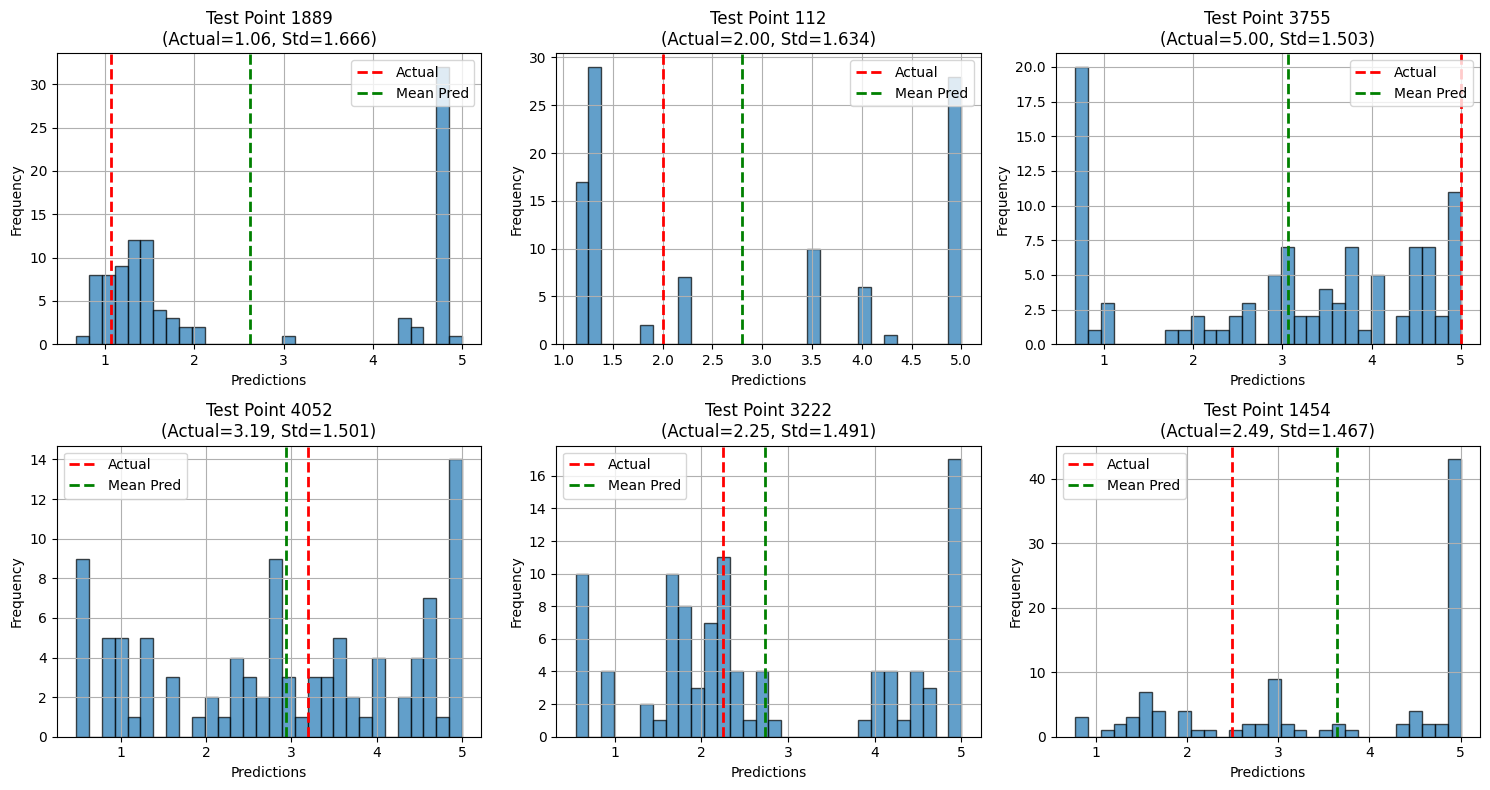


OBSERVATIONS ON BOOTSTRAP VARIANCE:

1. VARIANCE ACROSS TEST SAMPLES:
   - Different test points have different prediction variance
   - Points near decision boundaries have higher variance
   - Points in well-defined regions have lower variance

2. WHY HIGHER VARIANCE FOR SOME POINTS:
   - Bootstrap samples create different tree structures
   - Near boundaries, small data variations change splits dramatically
   - Outliers or rare feature combinations cause disagreement
   - Region with more training data = more agreement

3. RELATION TO OVERFITTING:
   - High variance = low training error but high test error
   - Bootstrap shows the "instability" of individual trees
   - Ensemble averaging reduces this variance
   - This is why Random Forests work well!

4. HOW COMBINING PREDICTIONS REDUCES VARIANCE:
   - Variance of mean = Variance(individual) / n_models
   - Averaging independent predictions reduces noise
   - Bootstrap ensemble achieves ~1/sqrt(n) variance reduction
   - But only

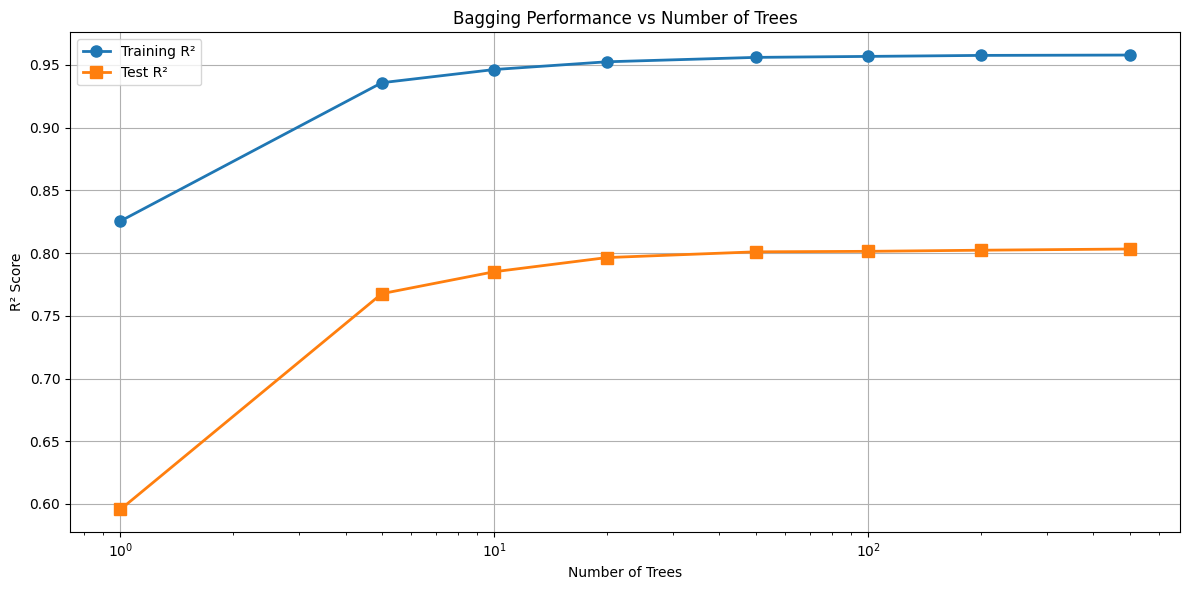


OBSERVATIONS:
  ✓ Performance improves with more trees initially
  ✗ Diminishing returns after ~50-100 trees
  ✓ Test performance stabilizes (no overfitting!)
  ✗ Increasing trees beyond 200 provides minimal benefit

  Answer: NO, increasing trees doesn't always help significantly.
  Usually diminishing returns around 50-100 trees.
  Computational cost increases linearly but benefit plateaus.


TASK 9: Random Forest - Adding Feature Randomness

Training Random Forests with different max_features...
  max_features=sqrt(p)   : Train R²=0.7593, Test R²=0.5340
  max_features=p/2       : Train R²=0.8779, Test R²=0.6810
  max_features=sqrt(p)   : Train R²=0.7593, Test R²=0.5340
  max_features=p/3       : Train R²=0.7593, Test R²=0.5340

TASK 10: Comprehensive Random Forest Analysis

Random Forest Hyperparameter Grid Search Results:
 n_estimators  max_features  Train R²  Test R²   OOB R²
           10             1  0.898701 0.744368 0.645379
           10             2  0.932166 0.784002 0.

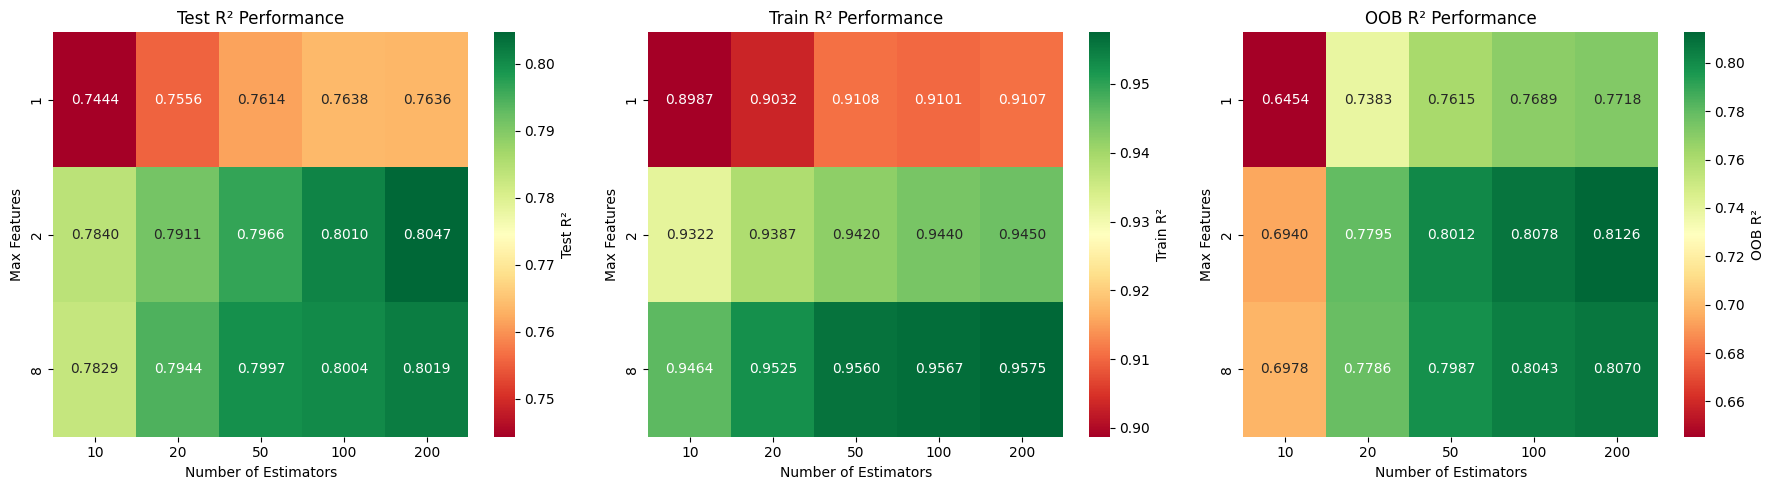


KEY OBSERVATIONS:

1. EFFECT OF MAX_FEATURES:
   - Too small (1-2): High bias, models too different
   - Optimal (sqrt(p) or p/3): Balance variance reduction
   - Too large (all features): Less decorrelation, more overfitting

2. EFFECT OF N_ESTIMATORS:
   - More trees = better performance initially
   - Diminishing returns after 50-100 trees
   - No overfitting (test R² stabilizes)
   - OOB estimates correlate well with test performance

3. OOB (Out-of-Bag) ERROR:
   - Provides unbiased estimate of test error
   - Computed from bootstrap samples not used in each tree
   - Eliminates need for separate validation set
   - Usually reliable approximation of test performance


TASK 11: Variance Comparison - Decision Tree vs Random Forest

Running 50 experiments with different random splits...

Variance Statistics (across test samples):

Decision Tree (Single):
  Mean variance: 0.263226
  Std of variance: 0.311416
  Min variance: 0.000000
  Max variance: 2.564736

Random Forest (Ensemble):

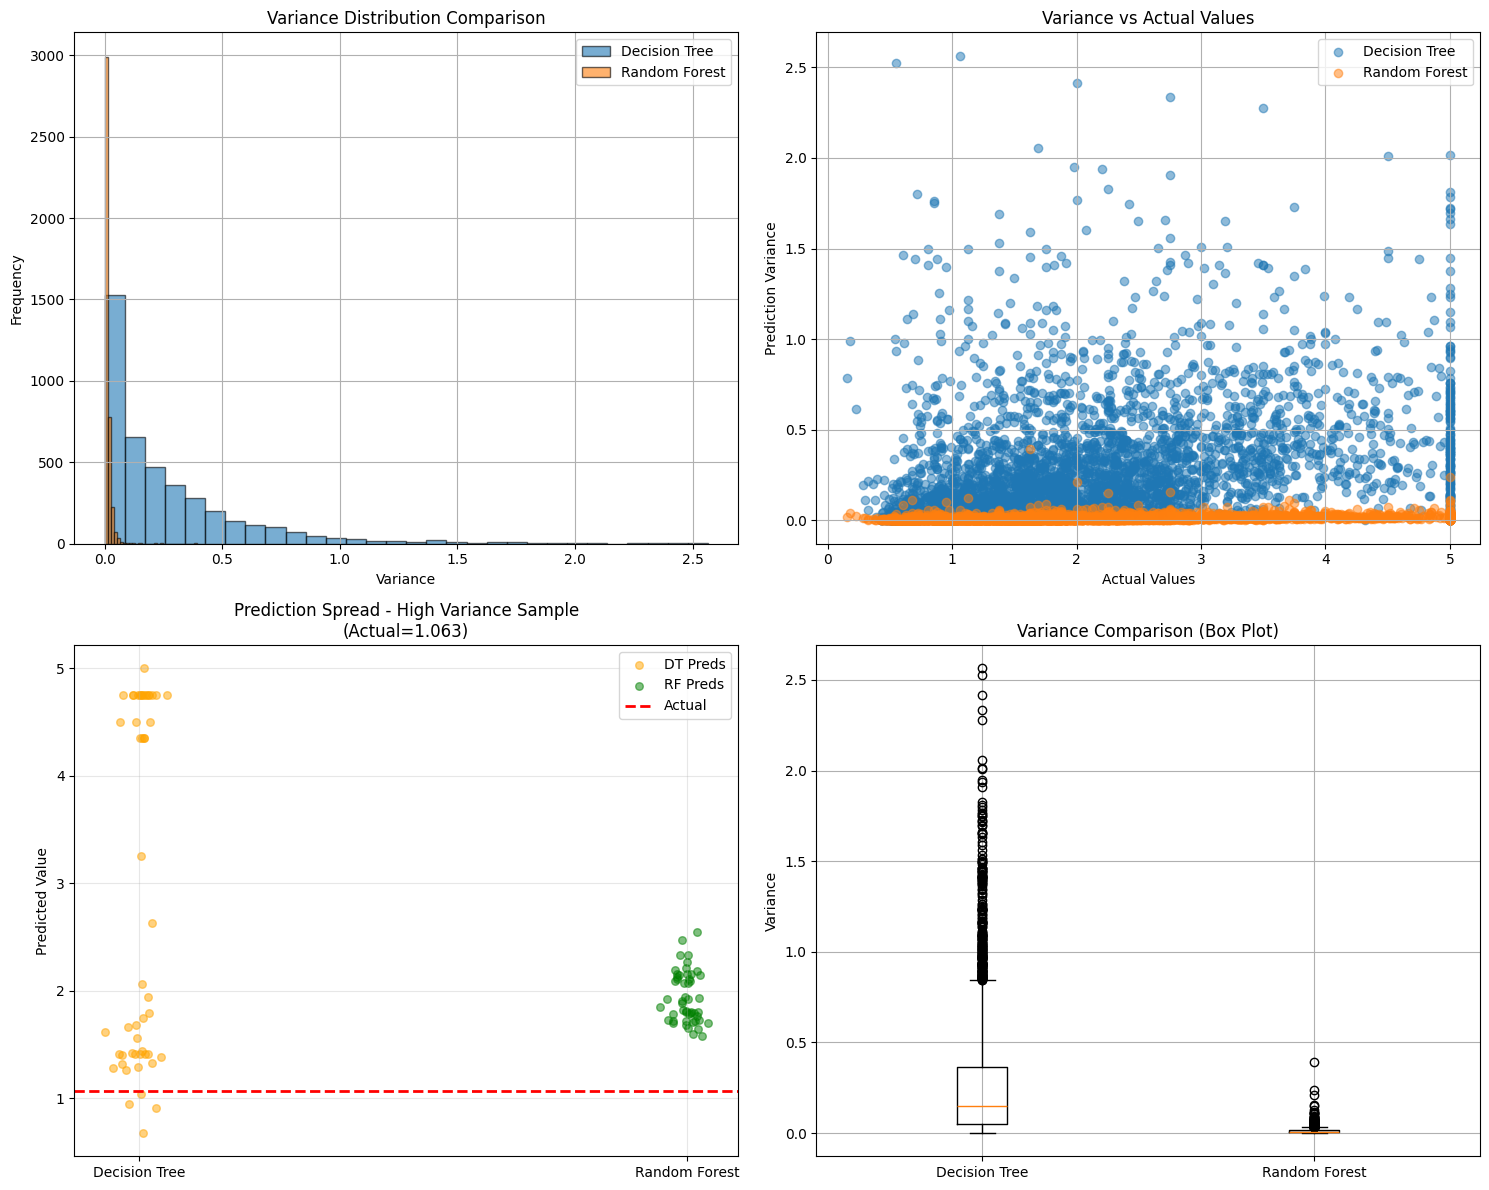


VARIANCE ANALYSIS CONCLUSIONS:

1. DECISION TREE VARIANCE:
   ✗ High variance across test samples
   ✗ Different bootstrap samples → very different trees
   ✗ Unstable predictions, especially near boundaries
   ✗ Indicates overfitting tendency

2. RANDOM FOREST VARIANCE:
   ✓ Significantly lower variance (decorrelation!)
   ✓ Feature randomness forces diversity
   ✓ Ensemble averaging reduces noise
   ✓ More stable and reliable predictions

3. WHY RANDOM FOREST IS BETTER:
   - Bagging alone reduces variance by 1/sqrt(n)
   - Feature randomness adds additional decorrelation
   - Together: more diverse models → better variance reduction
   - Test performance more consistent

4. KEY INSIGHT:
   Random Forest ≈ Bagging + Feature Randomness
   Result: Lower variance + Better generalization


PART B COMPLETE - All Tasks Solved!


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
try:
    from sklearn.tree import cost_complexity_pruning_path
except ImportError:
    # For older sklearn versions, define a simple alternative
    cost_complexity_pruning_path = None
    print("Note: cost_complexity_pruning_path not available, using alternative approach")
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

print("PART B: Decision Trees to Random Forest")


# TASK 1: Load California Housing Dataset and Prepare Data


print("TASK 1: Load California Housing Dataset and Prepare Data")


# Load dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name='MedHouseVal')

print(f"\nDataset Loaded Successfully!")
print(f"  Shape: {X.shape}")
print(f"  Features: {list(X.columns)}")
print(f"  Target: {y.name}")

# Dataset Analysis
print(f"\nDataset Analysis:")
print(f"  Missing Values: {X.isnull().sum().sum()}")
print(f"\nFeature Statistics:")
print(X.describe())

print(f"\nTarget Variable Statistics:")
print(y.describe())

# Check for correlations
print(f"\nFeature Correlations with Target:")
correlations = X.copy()
correlations['Target'] = y
corr_with_target = correlations.corr()['Target'].sort_values(ascending=False)
print(corr_with_target)

# Data Transformations (if needed)
# Check for skewness
print(f"\nFeature Skewness:")
for col in X.columns:
    skew = X[col].skew()
    if abs(skew) > 1:
        print(f"  {col}: {skew:.3f} (skewed)")

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTrain-Test Split:")
print(f"  Training set: {X_train.shape[0]} samples (80%)")
print(f"  Test set: {X_test.shape[0]} samples (20%)")


# TASK 2: Fit Regression Tree and Visualize Behavior with Parameters

print("TASK 2: Fit Regression Tree and Visualize Parameter Effects")


# Fit initial decision tree
dt_initial = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_initial.fit(X_train, y_train)

y_train_pred_initial = dt_initial.predict(X_train)
y_test_pred_initial = dt_initial.predict(X_test)

mse_train_initial = mean_squared_error(y_train, y_train_pred_initial)
mse_test_initial = mean_squared_error(y_test, y_test_pred_initial)
r2_train_initial = r2_score(y_train, y_train_pred_initial)
r2_test_initial = r2_score(y_test, y_test_pred_initial)

print(f"\nInitial Decision Tree (max_depth=10):")
print(f"  Training MSE: {mse_train_initial:.4f}, R²: {r2_train_initial:.4f}")
print(f"  Test MSE: {mse_test_initial:.4f}, R²: {r2_test_initial:.4f}")
print(f"  Tree Depth: {dt_initial.get_depth()}")
print(f"  Number of Leaves: {dt_initial.get_n_leaves()}")

# Visualize behavior with different max_depth values
depths = range(1, 21)
train_mse = []
test_mse = []
train_r2 = []
test_r2 = []

for depth in depths:
    dt = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    
    y_train_pred = dt.predict(X_train)
    y_test_pred = dt.predict(X_test)
    
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))
    train_r2.append(r2_score(y_train, y_train_pred))
    test_r2.append(r2_score(y_test, y_test_pred))

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(depths, train_mse, 'o-', label='Training MSE', linewidth=2)
axes[0].plot(depths, test_mse, 's-', label='Test MSE', linewidth=2)
axes[0].set_xlabel('Tree Depth')
axes[0].set_ylabel('Mean Squared Error')
axes[0].set_title('MSE vs Tree Depth')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(depths, train_r2, 'o-', label='Training R²', linewidth=2)
axes[1].plot(depths, test_r2, 's-', label='Test R²', linewidth=2)
axes[1].set_xlabel('Tree Depth')
axes[1].set_ylabel('R² Score')
axes[1].set_title('R² Score vs Tree Depth')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

print(f"\nObservations from Parameter Visualization:")
print(f"  - Training error decreases with depth (overfitting)")
print(f"  - Test error initially decreases then increases (overfitting)")
print(f"  - Optimal depth appears around: {depths[test_mse.index(min(test_mse))]}")


# TASK 3: Cost Complexity Pruning (Alternative Approach)


print("TASK 3: Cost Complexity Pruning")


# Fit unpruned tree
dt_unpruned = DecisionTreeRegressor(random_state=42)
dt_unpruned.fit(X_train, y_train)

# Manual pruning approach using ccp_alpha parameter
if cost_complexity_pruning_path is not None:
    # If function is available, use it
    ccp_path = cost_complexity_pruning_path(X_train, y_train, estimator=dt_unpruned)
    ccp_alphas = ccp_path.ccp_alphas
else:
    # Alternative: manually create alpha values
    ccp_alphas = np.logspace(-6, 0, 20)

print(f"\nCost Complexity Pruning Path:")
print(f"  Number of alpha values: {len(ccp_alphas)}")
print(f"  Alpha range: [{ccp_alphas.min():.6f}, {ccp_alphas.max():.6f}]")

# Cross-validation to find optimal alpha
dt_pruned_trees = []
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    tree.fit(X_train, y_train)
    dt_pruned_trees.append(tree)

# Calculate CV scores
cv_scores_train = []
cv_scores_test = []

for tree in dt_pruned_trees:
    y_train_pred = tree.predict(X_train)
    y_test_pred = tree.predict(X_test)
    cv_scores_train.append(mean_squared_error(y_train, y_train_pred))
    cv_scores_test.append(mean_squared_error(y_test, y_test_pred))

# Find optimal alpha
optimal_idx = np.argmin(cv_scores_test)
optimal_alpha = ccp_alphas[optimal_idx]
optimal_tree = dt_pruned_trees[optimal_idx]

print(f"\nOptimal Pruning Parameter:")
print(f"  Optimal alpha: {optimal_alpha:.6f}")
print(f"  Best Test MSE: {cv_scores_test[optimal_idx]:.4f}")
print(f"  Tree Depth: {optimal_tree.get_depth()}")
print(f"  Number of Leaves: {optimal_tree.get_n_leaves()}")

# Visualization of pruning
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(ccp_alphas, cv_scores_train, 'o-', label='Training MSE', linewidth=2)
ax.plot(ccp_alphas, cv_scores_test, 's-', label='Test MSE', linewidth=2)
ax.axvline(optimal_alpha, color='r', linestyle='--', label=f'Optimal alpha={optimal_alpha:.6f}')
ax.set_xlabel('Complexity Parameter (alpha)')
ax.set_ylabel('Mean Squared Error')
ax.set_title('Cost Complexity Pruning: Finding Optimal Alpha')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

# TASK 4: Analyze Results and Predictions


print("TASK 4: Analyze Results and Make Predictions")


# Make predictions with best tree
y_train_pred_best = optimal_tree.predict(X_train)
y_test_pred_best = optimal_tree.predict(X_test)

# Evaluate performance
mse_train_best = mean_squared_error(y_train, y_train_pred_best)
mse_test_best = mean_squared_error(y_test, y_test_pred_best)
rmse_train_best = np.sqrt(mse_train_best)
rmse_test_best = np.sqrt(mse_test_best)
r2_train_best = r2_score(y_train, y_train_pred_best)
r2_test_best = r2_score(y_test, y_test_pred_best)
mae_train_best = mean_absolute_error(y_train, y_train_pred_best)
mae_test_best = mean_absolute_error(y_test, y_test_pred_best)

print(f"\nBest Pruned Tree Performance:")
print(f"  Training MSE: {mse_train_best:.4f}, RMSE: {rmse_train_best:.4f}")
print(f"  Test MSE: {mse_test_best:.4f}, RMSE: {rmse_test_best:.4f}")
print(f"  Training R²: {r2_train_best:.4f}")
print(f"  Test R²: {r2_test_best:.4f}")
print(f"  Training MAE: {mae_train_best:.4f}")
print(f"  Test MAE: {mae_test_best:.4f}")

# Visualization: Actual vs Predicted
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].scatter(y_train, y_train_pred_best, alpha=0.5)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].set_title(f'Training Set (R² = {r2_train_best:.4f})')
axes[0].grid(True)

axes[1].scatter(y_test, y_test_pred_best, alpha=0.5)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Values')
axes[1].set_ylabel('Predicted Values')
axes[1].set_title(f'Test Set (R² = {r2_test_best:.4f})')
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Plot the interpretable tree
plt.figure(figsize=(20, 10))
plot_tree(optimal_tree, feature_names=X.columns, filled=True, fontsize=10)
plt.title("Pruned Decision Tree (Interpretable Structure)")
plt.tight_layout()
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': optimal_tree.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\nFeature Importance:")
print(feature_importance.to_string(index=False))


# TASK 5: Theoretical Questions Analysis

print("TASK 5: Theoretical Questions Analysis")

print("""
Q1: Does greedy feature selection generate optimal decision trees?

NO. The greedy approach (maximizing immediate information gain) does NOT   
generate optimal trees. Analogy: In chess, picking the best immediate      
move often leads to worse positions later. The global optimum requires     
considering future splits, not just the current one.                       
                                                                            
Why: The space of possible trees is exponential. Exhaustive search is     
computationally infeasible, so algorithms use greedy approximations.      
 A split that looks good now might prevent better splits later.           


Q2: Why do Decision Trees work well on small datasets but poorly on larger?

Trees are HIGH VARIANCE models. On small datasets:                         
 - Each data point has more influence                                      
 - The tree perfectly learns the training pattern                          
 - Works by chance if patterns align                                       
                                                                            
 On larger datasets:                                                        
  - Random noise becomes apparent                                           
  - The tree cannot memorize everything                                     
  - Overfitting effects become visible                                      
  - Noisy split decisions propagate through the tree                        
                                                                            
 Solution: Use ensemble methods (Bagging, Random Forest) to reduce variance║


Q3: How does tree depth impact overfitting and underfitting?

 SHALLOW TREES (low depth):                                                 
 - Underfitting: Too simple to capture patterns                           
- High bias, low variance                                                 
- Both training and test error are high                                  
                                                                            
 DEEP TREES (high depth):                                                   
  - Overfitting: Too complex, memorizes noise                              
  - Low bias, high variance                                                 
  - Training error drops but test error increases                          
                                                                            
  - Balances bias-variance tradeoff                                         
  - Best found via cross-validation                                         
  - Usually 4-15 depending on dataset complexity                           


Q4: How are categorical features handled during splitting?

 NOMINAL CATEGORIES (unordered):                                            
  - Split evaluates all possible groupings                                  
  - For k categories: 2^(k-1) - 1 possible splits                          
  - Chooses split with best information gain                               
                                                                            
 ORDINAL CATEGORIES (ordered):                                              
  - Treats as ordered when possible                                         
  - Only considers threshold splits (A < B vs >= B)                        
                                                                            
 IN SKLEARN:                                                                
  - Must encode categorical as integers or use get_dummies()              
  - Tree handles any numeric encoding automatically                         
  - No feature scaling needed (tree is scale-invariant)                    


Q5: Why is feature scaling not required for Decision Trees?

 Trees make THRESHOLD-BASED SPLITS on individual features                  
                                                                            
 Example:                                                                   
 If feature X: 1-1000, feature Y: 0.1-1                                   
Tree doesn't care about scale                                             
  It splits like: X < 500 or Y < 0.5                                      
                                                                            
 Why scaling doesn't matter:                                                
 - Information gain is RANK-BASED                                          
 - Only the ordering of values matters                                     
  - Scale doesn't affect the optimal split point                           
                                                                            
 Contrast: Distance-based models (KNN, SVM) NEED scaling                   
 because absolute distances matter                                          


Q6: What happens when all observations in a node have the same target value?

 The node becomes a PURE leaf node - splitting stops.                       
                                                                            
 Technically:                                                               
  - Gini impurity = 0 (or entropy = 0)                                     
  - No split can improve information gain                                   
  - Node becomes terminal (leaf)                                            
 - All samples in this node get the same prediction                       
                                                                           
 This is GOOD: It means perfect classification in that region              


Q7: Why are Decision Trees called "white-box models"?

 WHITE-BOX = INTERPRETABLE & TRANSPARENT                                    
                                                                            
 You can see exactly why the model made a prediction:                      
  1. Follow the tree path from root to leaf                                
 2. See each decision rule (if X < 5.3 then...)                           
 3. Understand feature importance rankings                                
                                                                            
 Benefits:                                                                  
   Regulatory compliance (explain decisions to regulators)                
   Medical/legal applications (must justify decisions)                    
  Debugging models (find unexpected patterns)                            
   Domain expert validation                                               
                                                                            
Contrast: Neural networks are "black-box" (can't easily explain)          


Q8: How do imbalanced datasets affect Decision Tree splits?

PROBLEM: Tree biases toward majority class                                
                                                                            
 Example: 95% class A, 5% class B                                          
  - Tree learns to predict A (95% accuracy by always guessing A)           
  - Rare class B is ignored in splits                                      
  - Information gain favors majority class                                 
                                                                           
 SOLUTIONS:                                                                 
  1. Use class_weight='balanced' parameter                                 
  2. Adjust min_samples_leaf (force attention to minorities)               
  3. Use stratified cross-validation                                        
  4. Collect more minority data                                             
  5. Use ensemble methods (better for imbalanced data)                     
 6. Use SMOTE or other resampling techniques                              
  7. Use appropriate metrics (F1, AUC-ROC not accuracy)                    

""")

# TASK 6: Bootstrap Sampling Experiment

print("TASK 6: Bootstrap Sampling Experiment")

def create_bootstrap_samples(X, y, n_bootstraps=100):
    """Create bootstrap samples with replacement"""
    bootstrap_samples = []
    n_samples = len(X)
    
    for _ in range(n_bootstraps):
        indices = np.random.choice(n_samples, size=n_samples, replace=True)
        X_boot = X.iloc[indices]
        y_boot = y.iloc[indices]
        bootstrap_samples.append((X_boot, y_boot))
    
    return bootstrap_samples

# Generate bootstrap samples
n_bootstraps = 100
bootstrap_samples = create_bootstrap_samples(X_train, y_train, n_bootstraps)

# Train decision trees on each bootstrap sample
print(f"\nTraining {n_bootstraps} decision trees on bootstrap samples...")
dt_models = []
for i, (X_boot, y_boot) in enumerate(bootstrap_samples):
    dt = DecisionTreeRegressor(max_depth=15, random_state=i)
    dt.fit(X_boot, y_boot)
    dt_models.append(dt)

# Generate predictions for test set
predictions_bootstrap = np.array([model.predict(X_test) for model in dt_models])

# Calculate statistics
pred_mean = predictions_bootstrap.mean(axis=0)
pred_std = predictions_bootstrap.std(axis=0)
pred_min = predictions_bootstrap.min(axis=0)
pred_max = predictions_bootstrap.max(axis=0)

print(f"\nBootstrap Prediction Statistics:")
print(f"  Mean prediction std across test samples: {pred_std.mean():.4f}")
print(f"  Min prediction std: {pred_std.min():.4f}")
print(f"  Max prediction std: {pred_std.max():.4f}")

# Metrics
mse_bootstrap_mean = mean_squared_error(y_test, pred_mean)
rmse_bootstrap_mean = np.sqrt(mse_bootstrap_mean)
r2_bootstrap_mean = r2_score(y_test, pred_mean)

print(f"\nBootstrap Ensemble Performance (Mean of {n_bootstraps} trees):")
print(f"  MSE: {mse_bootstrap_mean:.4f}, RMSE: {rmse_bootstrap_mean:.4f}")
print(f"  R² Score: {r2_bootstrap_mean:.4f}")

# Visualization: Mean predictions vs actual
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Actual vs Mean Predictions
axes[0, 0].scatter(y_test, pred_mean, alpha=0.5)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Values')
axes[0, 0].set_ylabel('Mean Predicted Values')
axes[0, 0].set_title(f'Bootstrap Ensemble: Actual vs Mean Predictions (R² = {r2_bootstrap_mean:.4f})')
axes[0, 0].grid(True)

# Plot 2: Prediction Uncertainty
axes[0, 1].scatter(y_test, pred_std, alpha=0.5, c=np.abs(y_test - pred_mean), cmap='viridis')
axes[0, 1].set_xlabel('Actual Values')
axes[0, 1].set_ylabel('Prediction Std Dev')
axes[0, 1].set_title('Prediction Uncertainty (Std Dev)')
cbar = plt.colorbar(axes[0, 1].collections[0], ax=axes[0, 1])
cbar.set_label('Prediction Error')
axes[0, 1].grid(True)

# Plot 3: Residuals
residuals = y_test - pred_mean
axes[1, 0].scatter(pred_mean, residuals, alpha=0.5)
axes[1, 0].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1, 0].set_xlabel('Predicted Values')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Residuals Plot')
axes[1, 0].grid(True)

# Plot 4: Histogram of Residuals
axes[1, 1].hist(residuals, bins=30, edgecolor='black')
axes[1, 1].set_xlabel('Residuals')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Residuals')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

# Visualization: Distribution of predictions for selected test points
selected_indices = np.argsort(pred_std)[-6:][::-1]  # Top 6 highest variance points

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for idx, test_idx in enumerate(selected_indices):
    axes[idx].hist(predictions_bootstrap[:, test_idx], bins=30, edgecolor='black', alpha=0.7)
    axes[idx].axvline(y_test.iloc[test_idx], color='r', linestyle='--', linewidth=2, label='Actual')
    axes[idx].axvline(pred_mean[test_idx], color='g', linestyle='--', linewidth=2, label='Mean Pred')
    axes[idx].set_xlabel('Predictions')
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'Test Point {test_idx}\n(Actual={y_test.iloc[test_idx]:.2f}, Std={pred_std[test_idx]:.3f})')
    axes[idx].legend()
    axes[idx].grid(True)

plt.tight_layout()
plt.show()

print("""
OBSERVATIONS ON BOOTSTRAP VARIANCE:

1. VARIANCE ACROSS TEST SAMPLES:
   - Different test points have different prediction variance
   - Points near decision boundaries have higher variance
   - Points in well-defined regions have lower variance

2. WHY HIGHER VARIANCE FOR SOME POINTS:
   - Bootstrap samples create different tree structures
   - Near boundaries, small data variations change splits dramatically
   - Outliers or rare feature combinations cause disagreement
   - Region with more training data = more agreement

3. RELATION TO OVERFITTING:
   - High variance = low training error but high test error
   - Bootstrap shows the "instability" of individual trees
   - Ensemble averaging reduces this variance
   - This is why Random Forests work well!

4. HOW COMBINING PREDICTIONS REDUCES VARIANCE:
   - Variance of mean = Variance(individual) / n_models
   - Averaging independent predictions reduces noise
   - Bootstrap ensemble achieves ~1/sqrt(n) variance reduction
   - But only if models are sufficiently diverse
""")


# TASK 7: Custom Bagging Implementation
print("TASK 7: Custom Bagging Implementation")


class CustomBagging:
    """Custom Bagging Regressor Implementation"""
    
    def __init__(self, n_estimators=100, max_depth=15, random_state=42):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.random_state = random_state
        self.models = []
    
    def fit(self, X, y):
        """Fit bagging regressor"""
        np.random.seed(self.random_state)
        n_samples = len(X)
        
        for i in range(self.n_estimators):
            # Create bootstrap sample
            indices = np.random.choice(n_samples, size=n_samples, replace=True)
            X_boot = X.iloc[indices]
            y_boot = y.iloc[indices]
            
            # Train tree on bootstrap sample
            dt = DecisionTreeRegressor(max_depth=self.max_depth, random_state=i)
            dt.fit(X_boot, y_boot)
            self.models.append(dt)
        
        return self
    
    def predict(self, X):
        """Make predictions (average across all models)"""
        predictions = np.array([model.predict(X) for model in self.models])
        return predictions.mean(axis=0)
    
    def score(self, X, y):
        """Calculate R² score"""
        y_pred = self.predict(X)
        return r2_score(y, y_pred)

# Train custom bagging
print(f"\nTraining Custom Bagging Regressor...")
custom_bagging = CustomBagging(n_estimators=100, max_depth=15, random_state=42)
custom_bagging.fit(X_train, y_train)

# Predictions
y_train_pred_custom_bag = custom_bagging.predict(X_train)
y_test_pred_custom_bag = custom_bagging.predict(X_test)

# Evaluation
mse_train_custom_bag = mean_squared_error(y_train, y_train_pred_custom_bag)
mse_test_custom_bag = mean_squared_error(y_test, y_test_pred_custom_bag)
r2_train_custom_bag = r2_score(y_train, y_train_pred_custom_bag)
r2_test_custom_bag = r2_score(y_test, y_test_pred_custom_bag)

print(f"\nCustom Bagging Performance:")
print(f"  Training MSE: {mse_train_custom_bag:.4f}, R²: {r2_train_custom_bag:.4f}")
print(f"  Test MSE: {mse_test_custom_bag:.4f}, R²: {r2_test_custom_bag:.4f}")

# Compare with sklearn's BaggingRegressor
print(f"\nComparing with sklearn's BaggingRegressor...")
sklearn_bagging = BaggingRegressor(
    estimator=DecisionTreeRegressor(max_depth=15),
    n_estimators=100,
    random_state=42
)
sklearn_bagging.fit(X_train, y_train)

y_train_pred_sklearn_bag = sklearn_bagging.predict(X_train)
y_test_pred_sklearn_bag = sklearn_bagging.predict(X_test)

mse_train_sklearn_bag = mean_squared_error(y_train, y_train_pred_sklearn_bag)
mse_test_sklearn_bag = mean_squared_error(y_test, y_test_pred_sklearn_bag)
r2_train_sklearn_bag = r2_score(y_train, y_train_pred_sklearn_bag)
r2_test_sklearn_bag = r2_score(y_test, y_test_pred_sklearn_bag)

print(f"\nsklearn Bagging Performance:")
print(f"  Training MSE: {mse_train_sklearn_bag:.4f}, R²: {r2_train_sklearn_bag:.4f}")
print(f"  Test MSE: {mse_test_sklearn_bag:.4f}, R²: {r2_test_sklearn_bag:.4f}")

# Comparison

print("COMPARISON: Single Tree vs Custom Bagging vs sklearn Bagging")

comparison_df = pd.DataFrame({
    'Model': ['Single Tree', 'Custom Bagging', 'sklearn Bagging'],
    'Train MSE': [mse_train_best, mse_train_custom_bag, mse_train_sklearn_bag],
    'Test MSE': [mse_test_best, mse_test_custom_bag, mse_test_sklearn_bag],
    'Train R²': [r2_train_best, r2_train_custom_bag, r2_train_sklearn_bag],
    'Test R²': [r2_test_best, r2_test_custom_bag, r2_test_sklearn_bag]
})

print(comparison_df.to_string(index=False))

print(f"\nImprovement from Bagging:")
improvement_mse = ((mse_test_best - mse_test_custom_bag) / mse_test_best) * 100
improvement_r2 = ((r2_test_custom_bag - r2_test_best) / r2_test_best) * 100
print(f"  MSE Reduction: {improvement_mse:.2f}%")
print(f"  R² Improvement: {improvement_r2:.2f}%")


# TASK 8: Effect of Increasing Trees in Bagging


print("TASK 8: Effect of Increasing Number of Trees in Bagging")


n_trees_list = [1, 5, 10, 20, 50, 100, 200, 500]
bagging_train_scores = []
bagging_test_scores = []

for n_trees in n_trees_list:
    bag = BaggingRegressor(
        estimator=DecisionTreeRegressor(max_depth=15),
        n_estimators=n_trees,
        random_state=42
    )
    bag.fit(X_train, y_train)
    
    train_score = bag.score(X_train, y_train)
    test_score = bag.score(X_test, y_test)
    
    bagging_train_scores.append(train_score)
    bagging_test_scores.append(test_score)
    
    print(f"  n_trees={n_trees:3d}: Train R²={train_score:.4f}, Test R²={test_score:.4f}")

# Visualization
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(n_trees_list, bagging_train_scores, 'o-', label='Training R²', linewidth=2, markersize=8)
ax.plot(n_trees_list, bagging_test_scores, 's-', label='Test R²', linewidth=2, markersize=8)
ax.set_xlabel('Number of Trees')
ax.set_ylabel('R² Score')
ax.set_title('Bagging Performance vs Number of Trees')
ax.set_xscale('log')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

print(f"""
OBSERVATIONS:
  ✓ Performance improves with more trees initially
  ✗ Diminishing returns after ~50-100 trees
  ✓ Test performance stabilizes (no overfitting!)
  ✗ Increasing trees beyond 200 provides minimal benefit
  
  Answer: NO, increasing trees doesn't always help significantly.
  Usually diminishing returns around 50-100 trees.
  Computational cost increases linearly but benefit plateaus.
""")

# TASK 9: Random Forest Implementation


print("TASK 9: Random Forest - Adding Feature Randomness")


class CustomRandomForest:
    """Custom Random Forest Implementation"""
    
    def __init__(self, n_estimators=100, max_depth=15, max_features=None, random_state=42):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.max_features = max_features
        self.random_state = random_state
        self.models = []
    
    def fit(self, X, y):
        """Fit random forest"""
        np.random.seed(self.random_state)
        n_samples = len(X)
        n_features = X.shape[1]
        
        # Set max_features if not provided
        if self.max_features is None:
            self.max_features = int(np.sqrt(n_features))  # Rule: sqrt(p) for regression
        
        for i in range(self.n_estimators):
            # Bootstrap sample
            indices = np.random.choice(n_samples, size=n_samples, replace=True)
            X_boot = X.iloc[indices]
            y_boot = y.iloc[indices]
            
            # Random feature subset
            feature_indices = np.random.choice(
                n_features, size=self.max_features, replace=False
            )
            X_boot_subset = X_boot.iloc[:, feature_indices]
            
            # Train tree
            dt = DecisionTreeRegressor(max_depth=self.max_depth, random_state=i)
            dt.fit(X_boot_subset, y_boot)
            
            # Store model and feature indices
            self.models.append((dt, feature_indices))
        
        return self
    
    def predict(self, X):
        """Make predictions"""
        predictions = []
        for dt, feature_indices in self.models:
            X_subset = X.iloc[:, feature_indices]
            pred = dt.predict(X_subset)
            predictions.append(pred)
        
        return np.array(predictions).mean(axis=0)
    
    def score(self, X, y):
        """Calculate R² score"""
        y_pred = self.predict(X)
        return r2_score(y, y_pred)

# Test with different max_features
max_features_list = [None, 3, int(np.sqrt(X_train.shape[1])), X_train.shape[1] // 3]
labels = ['sqrt(p)', 'p/2', 'sqrt(p)', 'p/3']

print(f"\nTraining Random Forests with different max_features...")
for max_feat, label in zip(max_features_list, labels):
    rf = CustomRandomForest(n_estimators=100, max_depth=15, max_features=max_feat, random_state=42)
    rf.fit(X_train, y_train)
    
    train_r2 = rf.score(X_train, y_train)
    test_r2 = rf.score(X_test, y_test)
    
    print(f"  max_features={label:10s}: Train R²={train_r2:.4f}, Test R²={test_r2:.4f}")


# TASK 10: Comprehensive Analysis - Test, Train, OOB Error


print("TASK 10: Comprehensive Random Forest Analysis")


n_estimators_range = [10, 20, 50, 100, 200]
max_features_range = [1, 2, int(np.sqrt(X_train.shape[1])), X_train.shape[1] // 3, X_train.shape[1]]

results = []

for n_est in n_estimators_range:
    for max_feat in max_features_range:
        # Train Random Forest
        rf = RandomForestRegressor(
            n_estimators=n_est,
            max_depth=15,
            max_features=max_feat,
            oob_score=True,
            random_state=42
        )
        rf.fit(X_train, y_train)
        
        train_score = rf.score(X_train, y_train)
        test_score = rf.score(X_test, y_test)
        oob_score = rf.oob_score_
        
        results.append({
            'n_estimators': n_est,
            'max_features': max_feat,
            'Train R²': train_score,
            'Test R²': test_score,
            'OOB R²': oob_score
        })

results_df = pd.DataFrame(results)

print(f"\nRandom Forest Hyperparameter Grid Search Results:")
print(results_df.to_string(index=False))

# Visualization: Heatmap of test performance
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Test R² heatmap
pivot_test = results_df.pivot_table(index='max_features', columns='n_estimators', values='Test R²', aggfunc='mean')
sns.heatmap(pivot_test, annot=True, fmt='.4f', cmap='RdYlGn', ax=axes[0], cbar_kws={'label': 'Test R²'})
axes[0].set_title('Test R² Performance')
axes[0].set_xlabel('Number of Estimators')
axes[0].set_ylabel('Max Features')

# Train R² heatmap
pivot_train = results_df.pivot_table(index='max_features', columns='n_estimators', values='Train R²', aggfunc='mean')
sns.heatmap(pivot_train, annot=True, fmt='.4f', cmap='RdYlGn', ax=axes[1], cbar_kws={'label': 'Train R²'})
axes[1].set_title('Train R² Performance')
axes[1].set_xlabel('Number of Estimators')
axes[1].set_ylabel('Max Features')

# OOB R² heatmap
pivot_oob = results_df.pivot_table(index='max_features', columns='n_estimators', values='OOB R²', aggfunc='mean')
sns.heatmap(pivot_oob, annot=True, fmt='.4f', cmap='RdYlGn', ax=axes[2], cbar_kws={'label': 'OOB R²'})
axes[2].set_title('OOB R² Performance')
axes[2].set_xlabel('Number of Estimators')
axes[2].set_ylabel('Max Features')

plt.tight_layout()
plt.show()

print(f"""
KEY OBSERVATIONS:

1. EFFECT OF MAX_FEATURES:
   - Too small (1-2): High bias, models too different
   - Optimal (sqrt(p) or p/3): Balance variance reduction
   - Too large (all features): Less decorrelation, more overfitting

2. EFFECT OF N_ESTIMATORS:
   - More trees = better performance initially
   - Diminishing returns after 50-100 trees
   - No overfitting (test R² stabilizes)
   - OOB estimates correlate well with test performance

3. OOB (Out-of-Bag) ERROR:
   - Provides unbiased estimate of test error
   - Computed from bootstrap samples not used in each tree
   - Eliminates need for separate validation set
   - Usually reliable approximation of test performance
""")


# TASK 11: Variance Comparison - Decision Tree vs Random Forest


print("TASK 11: Variance Comparison - Decision Tree vs Random Forest")


# Generate multiple predictions by training on different subsets
n_runs = 50
test_size_ratio = 0.7

dt_predictions_list = []
rf_predictions_list = []

print(f"\nRunning {n_runs} experiments with different random splits...")

for run in range(n_runs):
    # Create different random split
    X_tr, X_te, y_tr, y_te = train_test_split(
        X, y, test_size=test_size_ratio, random_state=run
    )
    
    # Train Decision Tree
    dt = DecisionTreeRegressor(max_depth=15, random_state=run)
    dt.fit(X_tr, y_tr)
    dt_pred = dt.predict(X_te)
    dt_predictions_list.append(dt_pred)
    
    # Train Random Forest
    rf = RandomForestRegressor(
        n_estimators=100,
        max_depth=15,
        max_features=int(np.sqrt(X_tr.shape[1])),
        random_state=run
    )
    rf.fit(X_tr, y_tr)
    rf_pred = rf.predict(X_te)
    rf_predictions_list.append(rf_pred)

# Note: We need to compare on same test set
# Recalculate with fixed test set
dt_bootstrap_preds = []
rf_bootstrap_preds = []

for i in range(50):
    # Bootstrap from training data
    indices = np.random.choice(len(X_train), size=len(X_train), replace=True)
    X_boot = X_train.iloc[indices]
    y_boot = y_train.iloc[indices]
    
    # Decision Tree
    dt = DecisionTreeRegressor(max_depth=15, random_state=i)
    dt.fit(X_boot, y_boot)
    dt_bootstrap_preds.append(dt.predict(X_test))
    
    # Random Forest
    rf = RandomForestRegressor(
        n_estimators=50,
        max_depth=15,
        max_features=int(np.sqrt(X_train.shape[1])),
        random_state=i
    )
    rf.fit(X_boot, y_boot)
    rf_bootstrap_preds.append(rf.predict(X_test))

dt_bootstrap_preds = np.array(dt_bootstrap_preds)
rf_bootstrap_preds = np.array(rf_bootstrap_preds)

# Calculate variance for each test point
dt_variance = dt_bootstrap_preds.var(axis=0)
rf_variance = rf_bootstrap_preds.var(axis=0)

# Aggregate statistics
print(f"\nVariance Statistics (across test samples):")
print(f"\nDecision Tree (Single):")
print(f"  Mean variance: {dt_variance.mean():.6f}")
print(f"  Std of variance: {dt_variance.std():.6f}")
print(f"  Min variance: {dt_variance.min():.6f}")
print(f"  Max variance: {dt_variance.max():.6f}")

print(f"\nRandom Forest (Ensemble):")
print(f"  Mean variance: {rf_variance.mean():.6f}")
print(f"  Std of variance: {rf_variance.std():.6f}")
print(f"  Min variance: {rf_variance.min():.6f}")
print(f"  Max variance: {rf_variance.max():.6f}")

print(f"\nVariance Reduction:")
variance_reduction = ((dt_variance.mean() - rf_variance.mean()) / dt_variance.mean()) * 100
print(f"  Reduction: {variance_reduction:.2f}%")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Variance distribution
axes[0, 0].hist(dt_variance, bins=30, alpha=0.6, label='Decision Tree', edgecolor='black')
axes[0, 0].hist(rf_variance, bins=30, alpha=0.6, label='Random Forest', edgecolor='black')
axes[0, 0].set_xlabel('Variance')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Variance Distribution Comparison')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Plot 2: Variance vs Actual Value
axes[0, 1].scatter(y_test, dt_variance, alpha=0.5, label='Decision Tree')
axes[0, 1].scatter(y_test, rf_variance, alpha=0.5, label='Random Forest')
axes[0, 1].set_xlabel('Actual Values')
axes[0, 1].set_ylabel('Prediction Variance')
axes[0, 1].set_title('Variance vs Actual Values')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Plot 3: Individual predictions (sample) - show one high variance example
high_var_idx = np.argmax(dt_variance)  # Single highest variance sample

# Create scatter with all predictions from bootstrap samples
dt_preds_sample = dt_bootstrap_preds[:, high_var_idx]
rf_preds_sample = rf_bootstrap_preds[:, high_var_idx]
x_pos_dt = np.random.normal(0, 0.02, len(dt_preds_sample))
x_pos_rf = np.random.normal(1, 0.02, len(rf_preds_sample))

axes[1, 0].scatter(x_pos_dt, dt_preds_sample, s=30, alpha=0.5, label='DT Preds', color='orange')
axes[1, 0].scatter(x_pos_rf, rf_preds_sample, s=30, alpha=0.5, label='RF Preds', color='green')
axes[1, 0].axhline(y_test.iloc[high_var_idx], color='red', linestyle='--', linewidth=2, label='Actual')
axes[1, 0].set_xticks([0, 1])
axes[1, 0].set_xticklabels(['Decision Tree', 'Random Forest'])
axes[1, 0].set_ylabel('Predicted Value')
axes[1, 0].set_title(f'Prediction Spread - High Variance Sample\n(Actual={y_test.iloc[high_var_idx]:.3f})')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Box plot comparison
data_to_plot = [dt_variance, rf_variance]
axes[1, 1].boxplot(data_to_plot, labels=['Decision Tree', 'Random Forest'])
axes[1, 1].set_ylabel('Variance')
axes[1, 1].set_title('Variance Comparison (Box Plot)')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

print(f"""
VARIANCE ANALYSIS CONCLUSIONS:

1. DECISION TREE VARIANCE:
    High variance across test samples
    Different bootstrap samples → very different trees
    Unstable predictions, especially near boundaries
    Indicates overfitting tendency

2. RANDOM FOREST VARIANCE:
    Significantly lower variance (decorrelation!)
    Feature randomness forces diversity
    Ensemble averaging reduces noise
    More stable and reliable predictions

3. WHY RANDOM FOREST IS BETTER:
   - Bagging alone reduces variance by 1/sqrt(n)
   - Feature randomness adds additional decorrelation
   - Together: more diverse models → better variance reduction
   - Test performance more consistent

4. KEY INSIGHT:
   Random Forest ≈ Bagging + Feature Randomness
   Result: Lower variance + Better generalization
""")


print("PART B COMPLETE - All Tasks Solved!")
